# Presentational notebook

This notebooks combines all the logs into nice plots for presentation

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_hists(lorafa_hist, lorafa_svd, title, metric_key):

    _, axs = plt.subplots(1, 3, figsize=(18, 6))

    lorafa_train_loss = lorafa_hist['train_loss']
    lorafa_svd_train_loss = lorafa_svd['train_loss']

    axs[0].plot(lorafa_train_loss)
    axs[0].plot(lorafa_svd_train_loss)
    axs[0].title.set_text('Training loss')

    lorafa_val_loss = lorafa_hist['val_loss']
    lorafa_val_test_loss = lorafa_svd['val_loss']

    axs[1].plot(lorafa_val_loss)
    axs[1].plot(lorafa_val_test_loss)
    axs[1].title.set_text('Val loss')

    lorafa_val_metric = lorafa_hist[f'val_{metric_key}']
    lorafa_val_test_metric = lorafa_svd[f'val_{metric_key}']

    axs[2].plot(lorafa_val_metric, label='lorafa')
    axs[2].plot(lorafa_val_test_metric, label='lorafa-svd')
    axs[2].title.set_text(f'Val {metric_key}')

    plt.legend()
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

## Experiments with MRPC

### Different learning-rates/ranks



In [ ]:
# read json logs/full_logs.MRPC.json
with open('logs/full_logs.MRPC.json', 'r') as f:
    full_logs = json.load(f)

print("Considered hyper-params for MRPC (lr/rank):\n"+'\n'.join(map(str, list(full_logs.keys()))))

Considered hyper-params for MRPC (lr/rank):
(5e-05, 8)
(5e-05, 4)
(5e-05, 2)
(5e-05, 1)
(7e-05, 8)
(7e-05, 4)
(7e-05, 2)
(7e-05, 1)
(0.0001, 8)
(0.0001, 4)
(0.0001, 2)
(0.0001, 1)
(0.0004, 8)
(0.0004, 4)
(0.0004, 2)
(0.0004, 1)
(0.005, 8)
(0.005, 4)
(0.005, 2)
(0.005, 1)


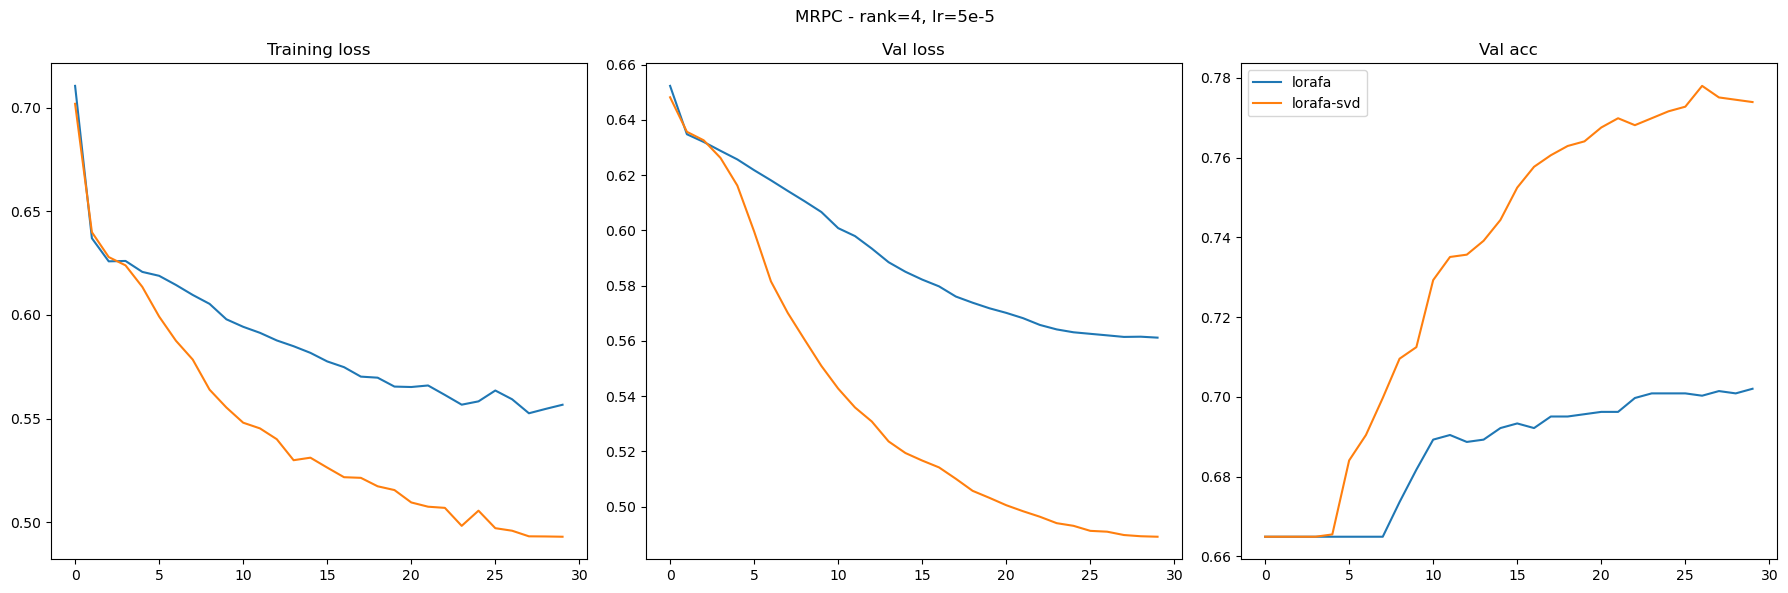

In [ ]:
plot_hists(full_logs['(5e-05, 4)']['kaiming'], full_logs['(5e-05, 4)']['svd'], 'MRPC - rank=4, lr=5e-5', 'acc')

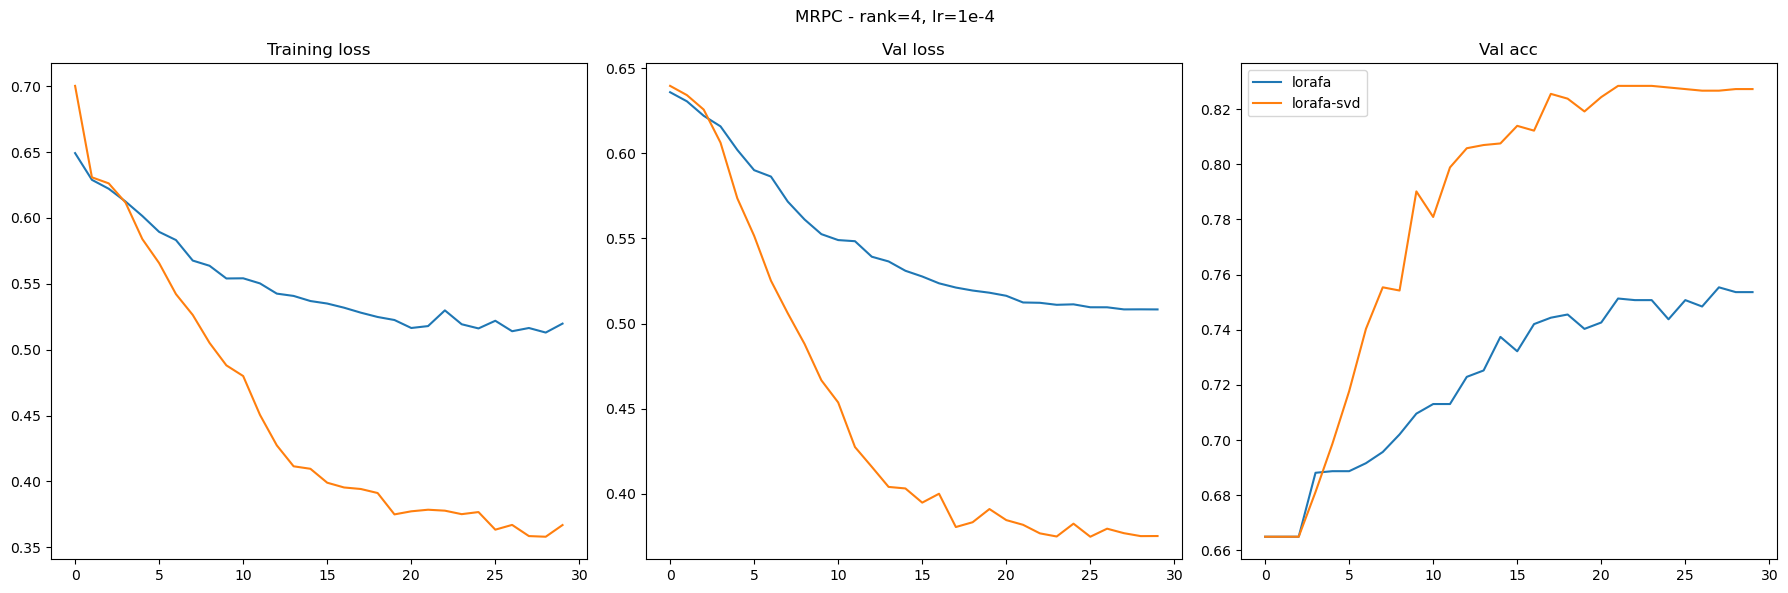

In [ ]:
plot_hists(full_logs['(0.0001, 4)']['kaiming'], full_logs['(0.0001, 4)']['svd'], 'MRPC - rank=4, lr=1e-4', 'acc')

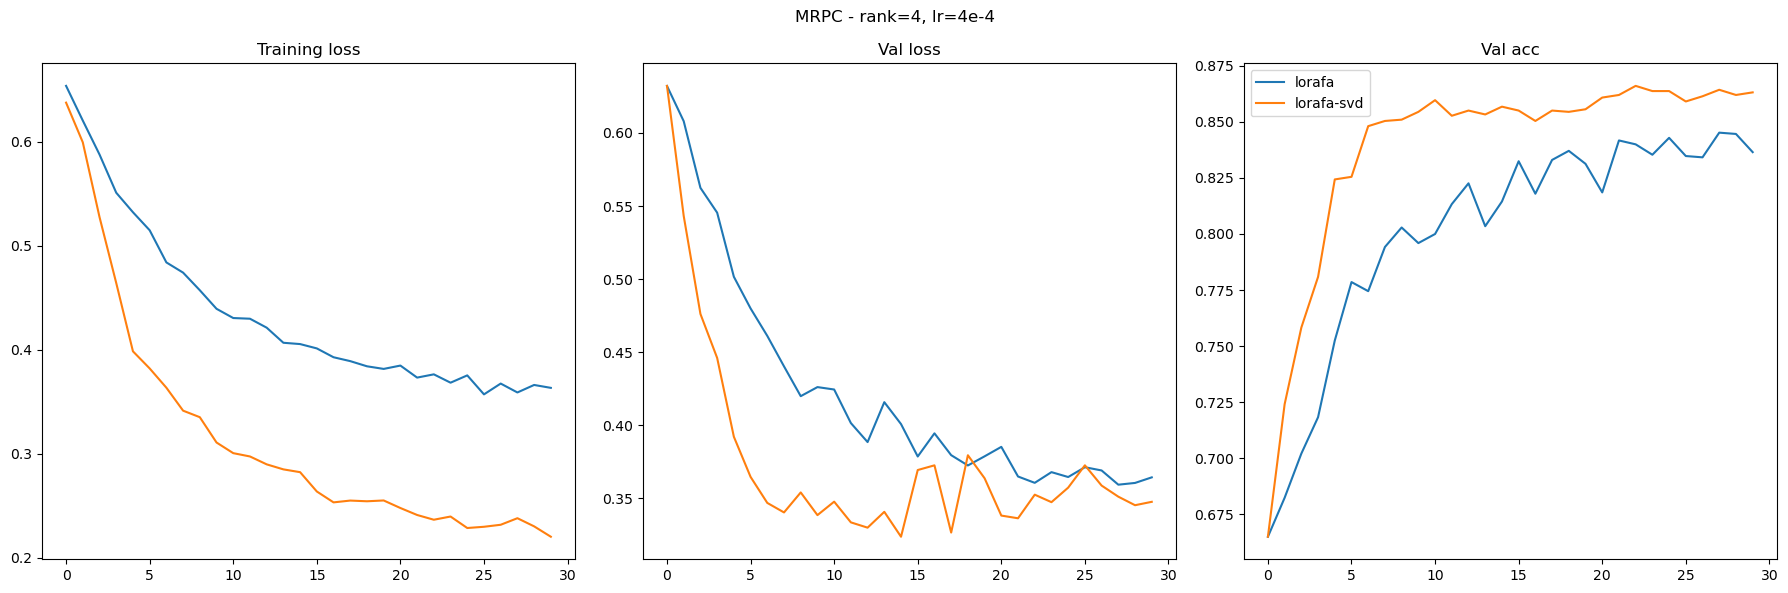

In [ ]:
plot_hists(full_logs['(0.0004, 4)']['kaiming'], full_logs['(0.0004, 4)']['svd'], 'MRPC - rank=4, lr=4e-4', 'acc')

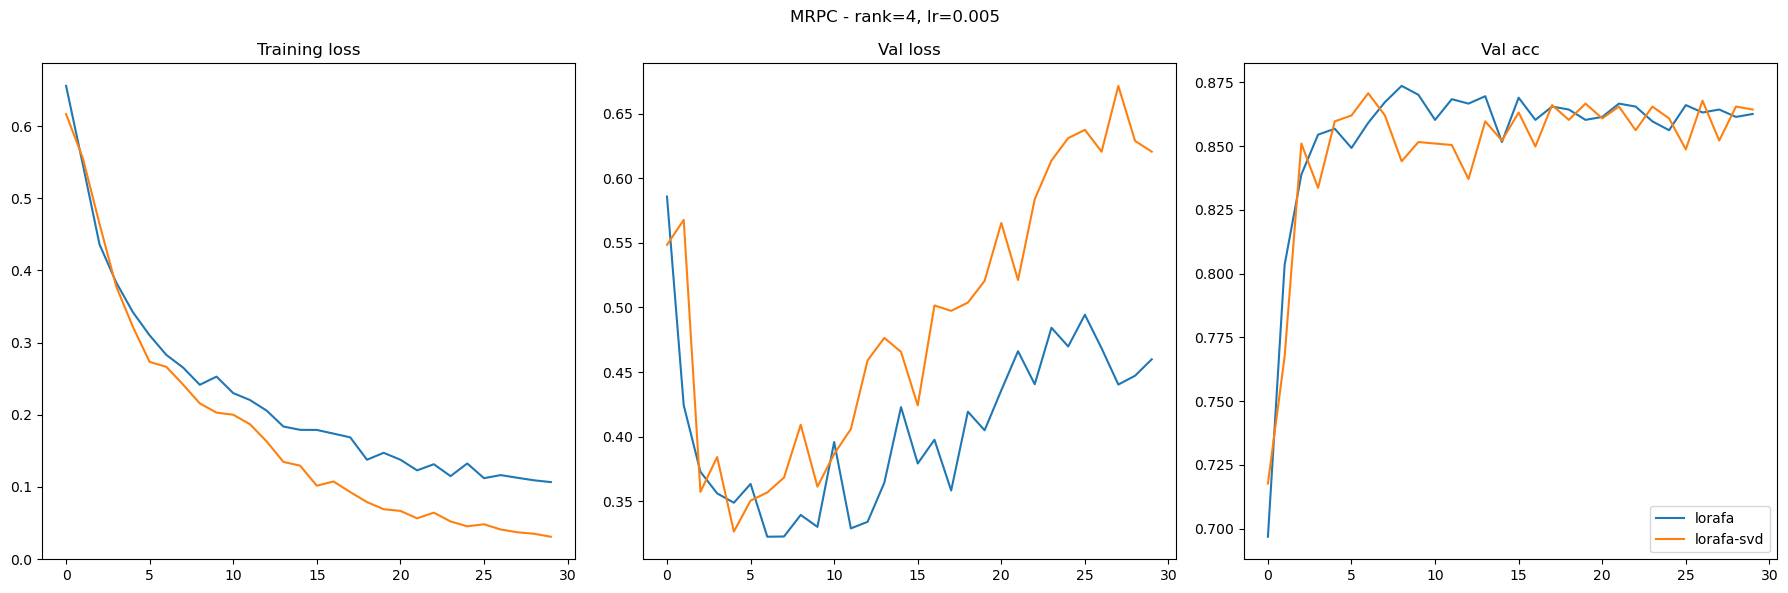

In [ ]:
plot_hists(full_logs['(0.005, 4)']['kaiming'], full_logs['(0.005, 4)']['svd'], 'MRPC - rank=4, lr=0.005', 'acc')

### Regularization effect (still MRPC)

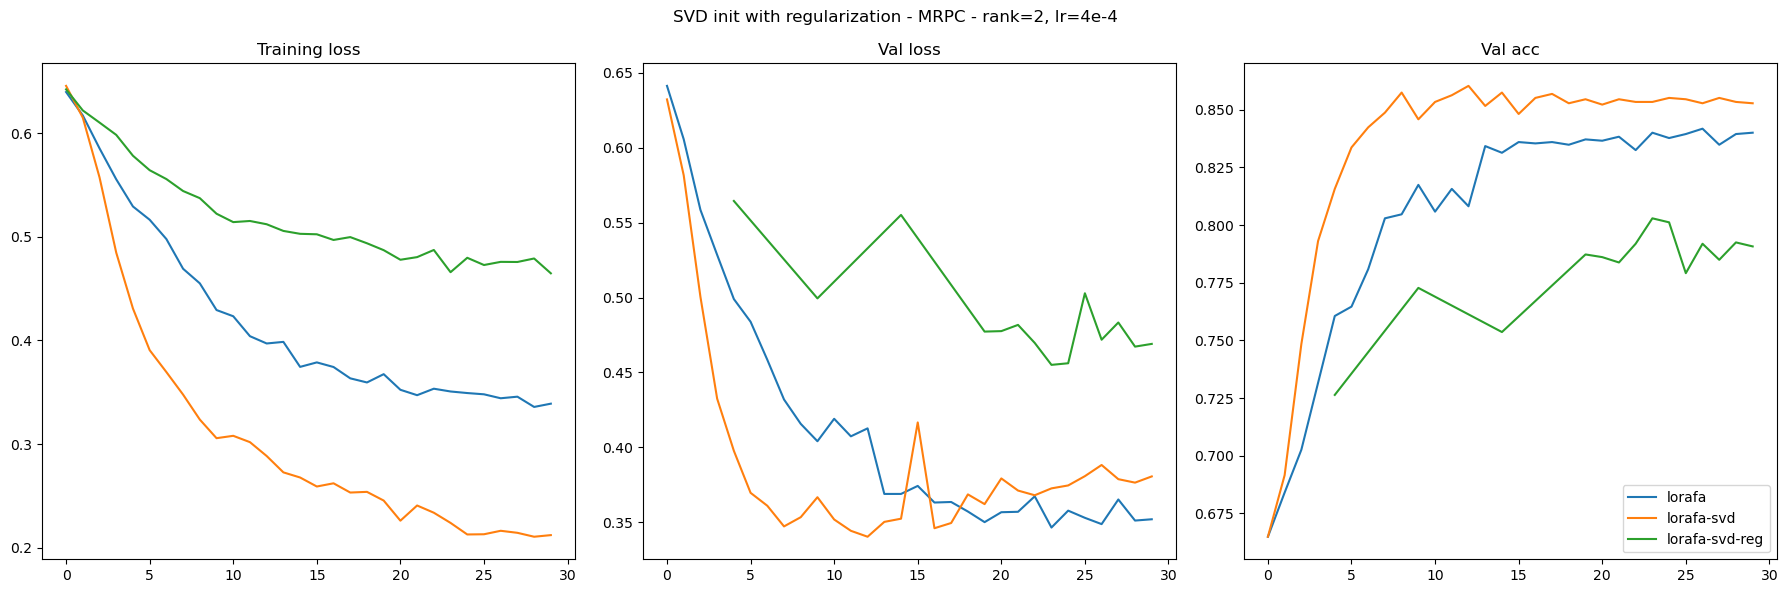

In [ ]:
with open('logs/history.svd-reg.MRPC.json', 'r') as f:
    svd_reg_logs = json.load(f)

_, axs = plt.subplots(1, 3, figsize=(18, 6))


axs[0].plot(full_logs['(0.0004, 2)']['kaiming']['train_loss'])
axs[0].plot(full_logs['(0.0004, 2)']['svd']['train_loss'])
axs[0].plot(svd_reg_logs['train_loss'])
axs[0].title.set_text('Training loss')

x_vals = [4, 9, 14, 19] + list(range(20, 30)) # cause validation steps were like that

axs[1].plot(full_logs['(0.0004, 2)']['kaiming']['val_loss'])
axs[1].plot(full_logs['(0.0004, 2)']['svd']['val_loss'])
axs[1].plot(x_vals, svd_reg_logs['val_loss'])
axs[1].title.set_text('Val loss')

axs[2].plot(full_logs['(0.0004, 2)']['kaiming']['val_acc'], label='lorafa')
axs[2].plot(full_logs['(0.0004, 2)']['svd']['val_acc'], label='lorafa-svd')
axs[2].plot(x_vals, svd_reg_logs['val_acc'], label='lorafa-svd-reg')
axs[2].title.set_text(f'Val acc')

plt.suptitle("SVD init with regularization - MRPC - rank=2, lr=4e-4")
plt.legend()
plt.tight_layout()
plt.show()

## Experiments with COLA

Let's plot more stuff

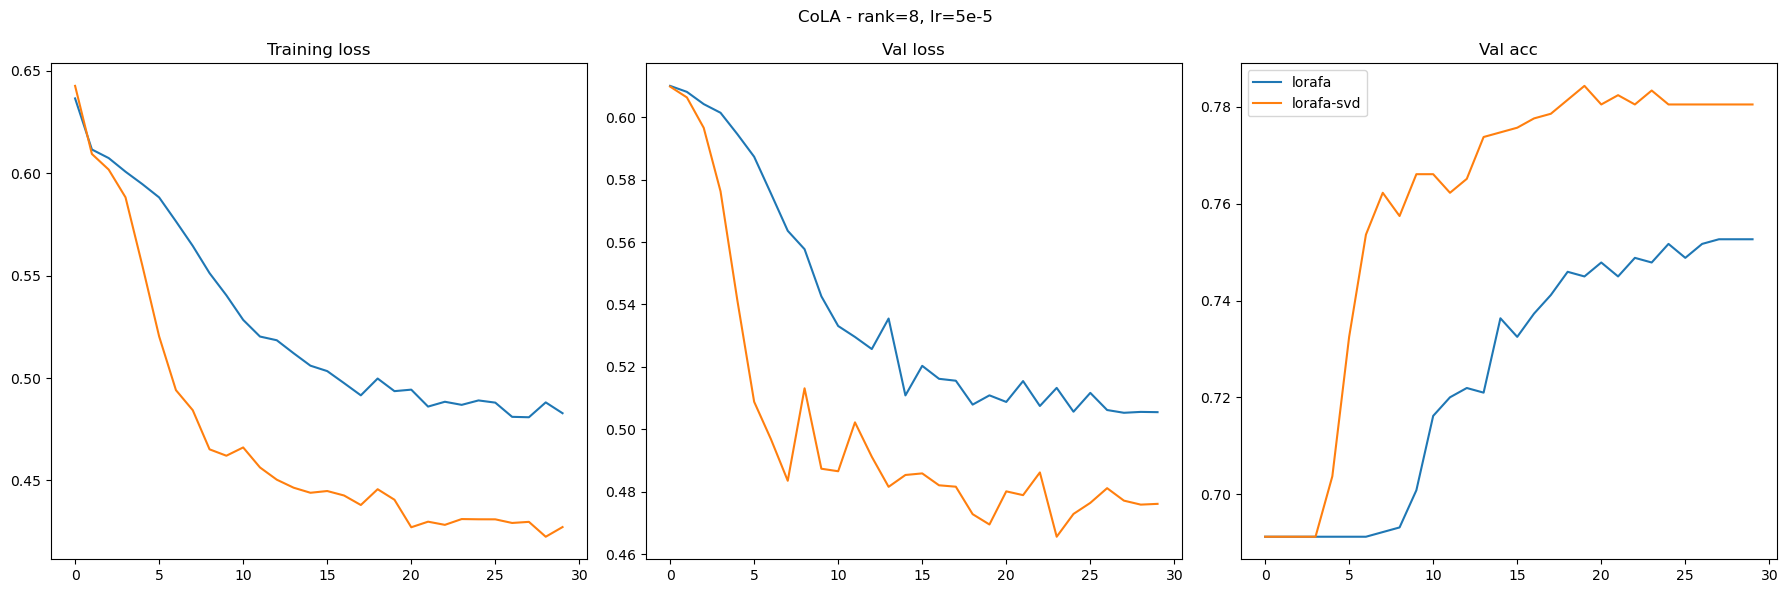

In [ ]:
with open('logs/cola_log_5e-05_8.json', 'r') as f:
    cola_logs = json.load(f)

plot_hists(cola_logs['kaiming'], cola_logs['svd'], 'CoLA - rank=8, lr=5e-5', 'acc')

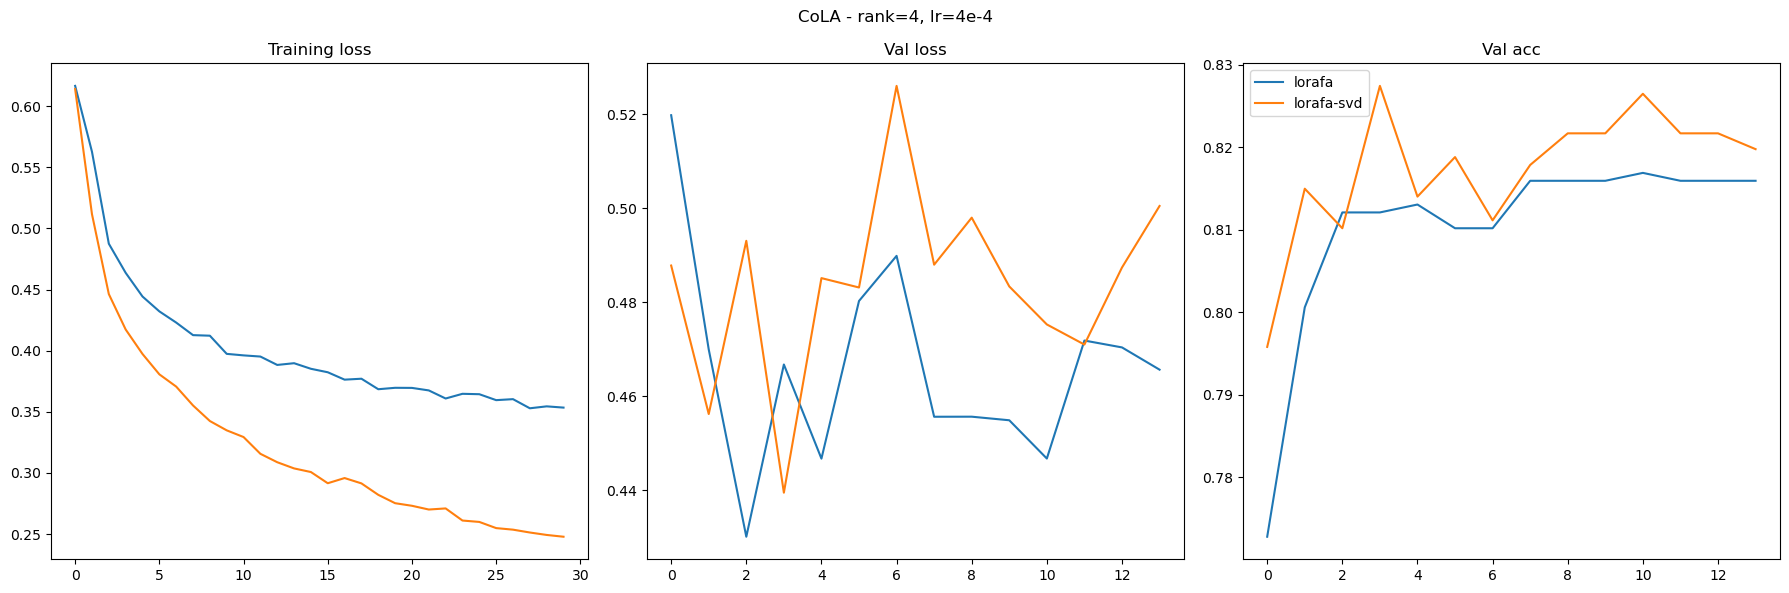

In [ ]:
with open('logs/cola_log_4e-04_4.json', 'r') as f:
    cola_logs = json.load(f)

plot_hists(cola_logs['kaiming'], cola_logs['svd'], 'CoLA - rank=4, lr=4e-4', 'acc')

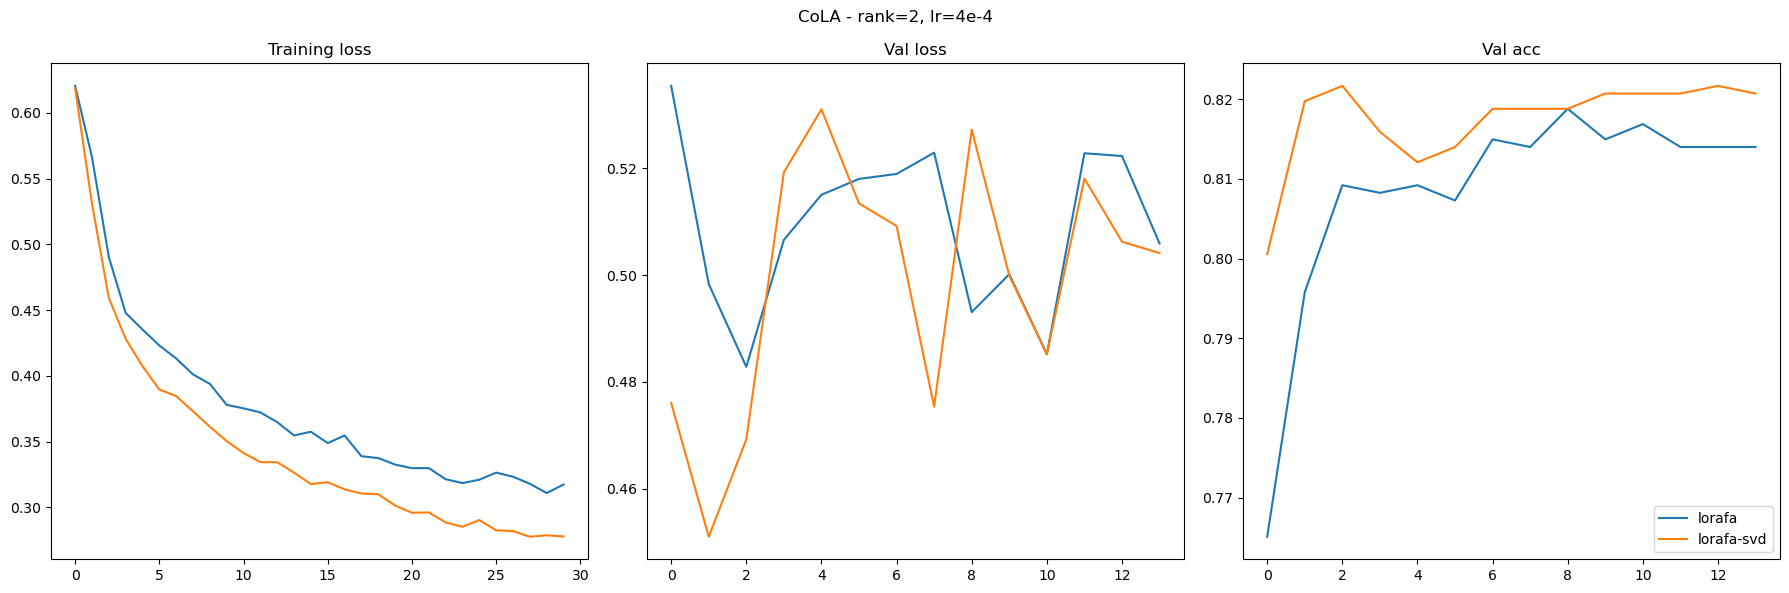

In [ ]:
with open('logs/cola_log_4e-04_2.json', 'r') as f:
    cola_logs = json.load(f)

plot_hists(cola_logs['kaiming'], cola_logs['svd'], 'CoLA - rank=2, lr=4e-4', 'acc')

### Experiments with RTE

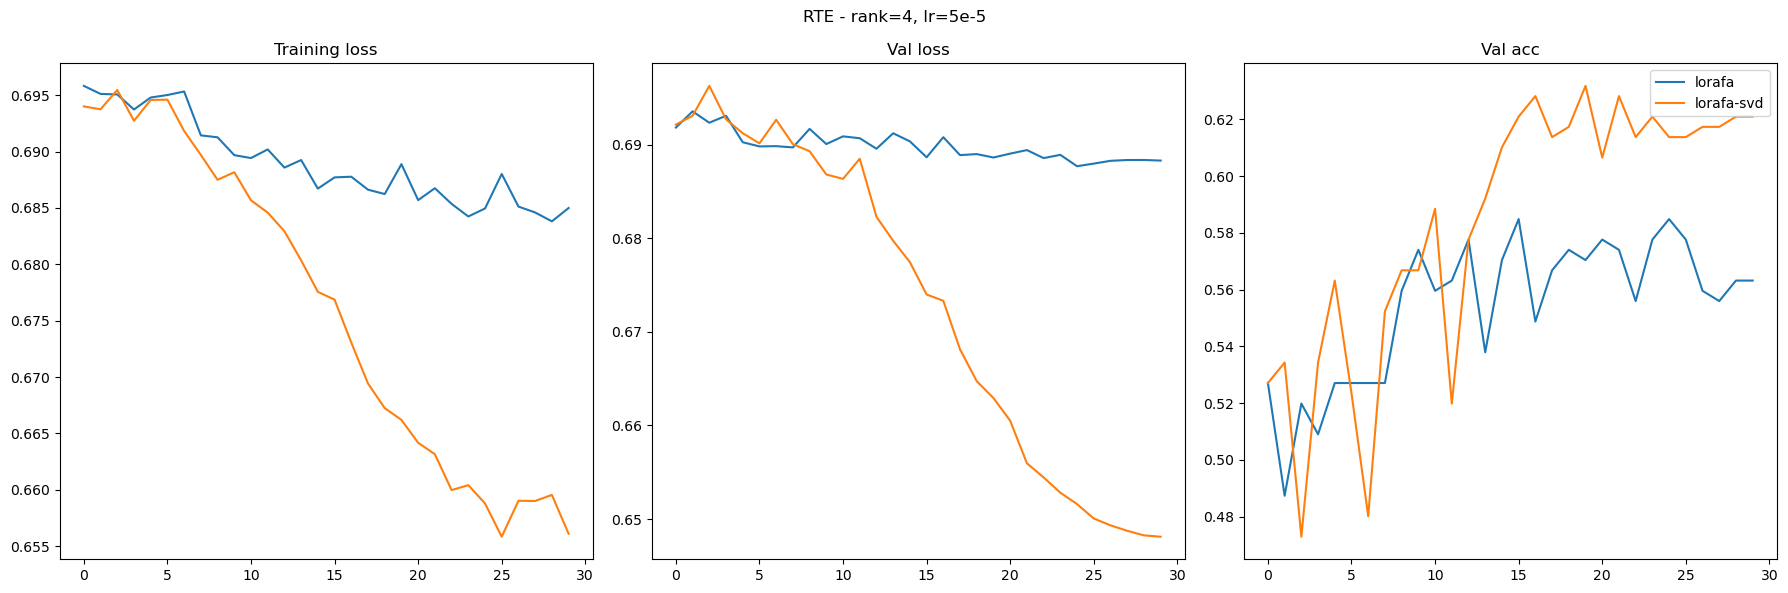

In [ ]:
# read rte_log_5e-05_4.json
with open('logs/rte_log_5e-05_4.json', 'r') as f:
    rte_logs = json.load(f)

plot_hists(rte_logs['kaiming'], rte_logs['svd'], 'RTE - rank=4, lr=5e-5', 'acc')

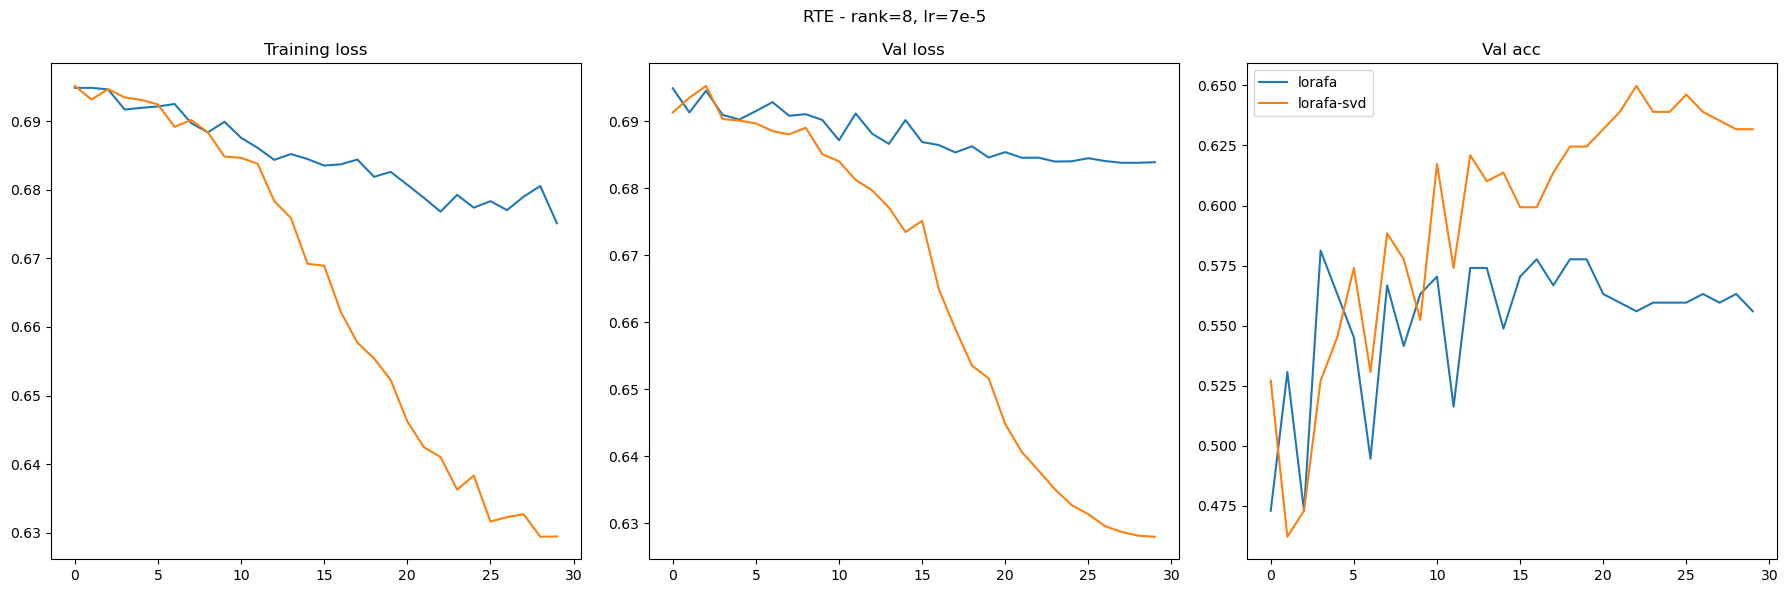

In [ ]:
# read rte_log_7e-05-4.json
with open('logs/rte_log_7e-05_8.json', 'r') as f:
    rte_logs = json.load(f)

plot_hists(rte_logs['kaiming'], rte_logs['svd'], 'RTE - rank=8, lr=7e-5', 'acc')

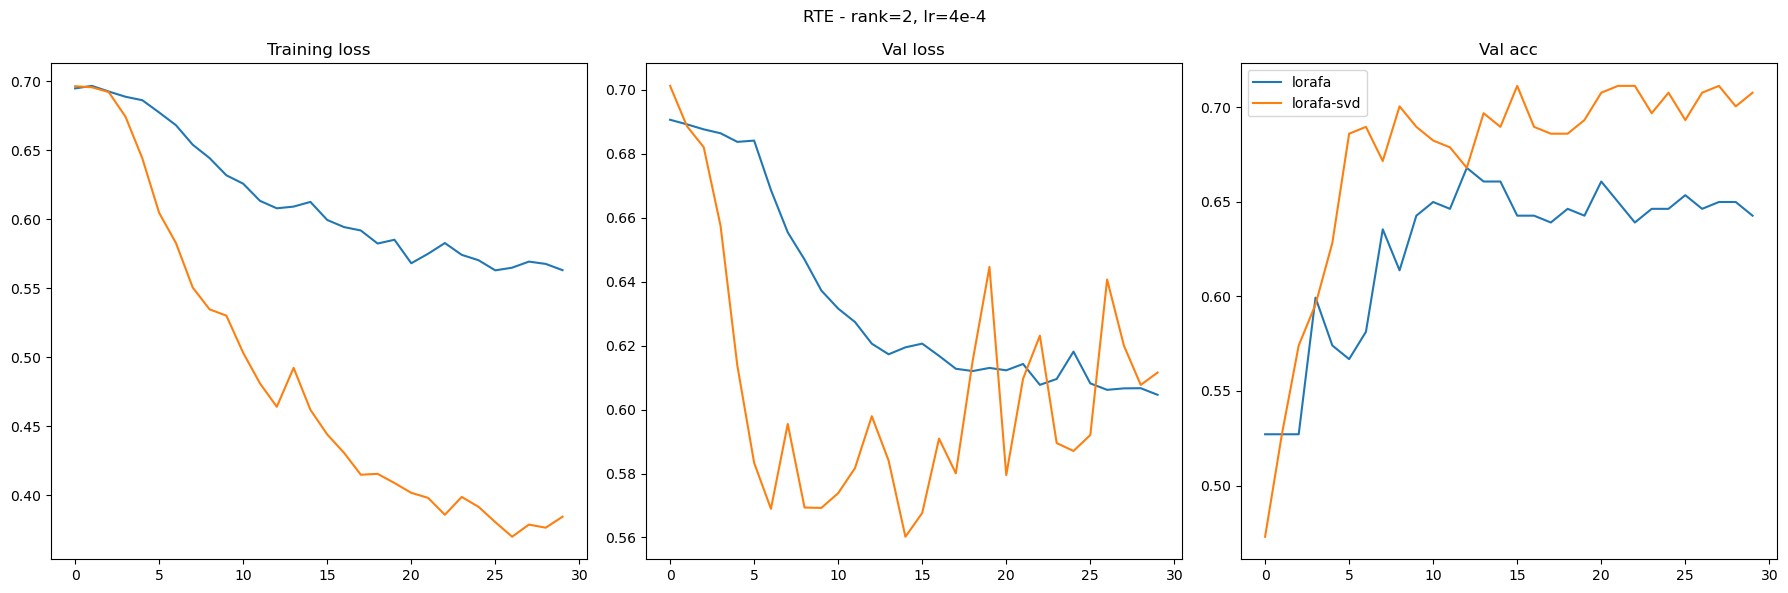

In [ ]:
# read rte_log_0.0004_2.json
with open('logs/rte_log_0.0004_2.json', 'r') as f:
    rte_logs = json.load(f)

plot_hists(rte_logs['kaiming'], rte_logs['svd'], 'RTE - rank=2, lr=4e-4', 'acc')

#Expierements with STS-B

In [3]:
with open('logs/log_0.0004_2_STS-B.json', 'r') as f:
    STS_B_log = json.load(f)

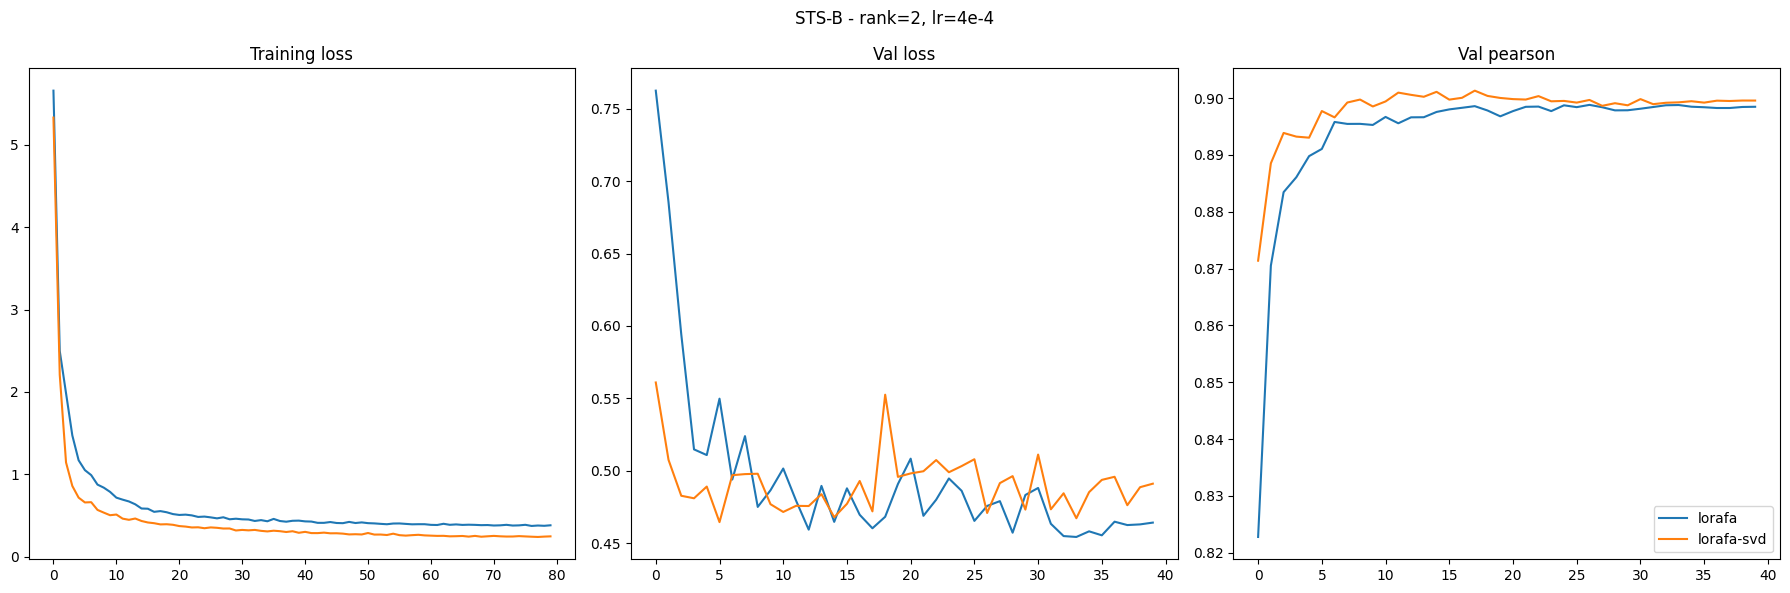

In [4]:
plot_hists(STS_B_log['kaiming'], STS_B_log['svd'], 'STS-B - rank=2, lr=4e-4', 'pearson')
